In [27]:
from PIL import Image
import cv2
import json
import os

In [2]:
file = Image.open('test_image.jpg')

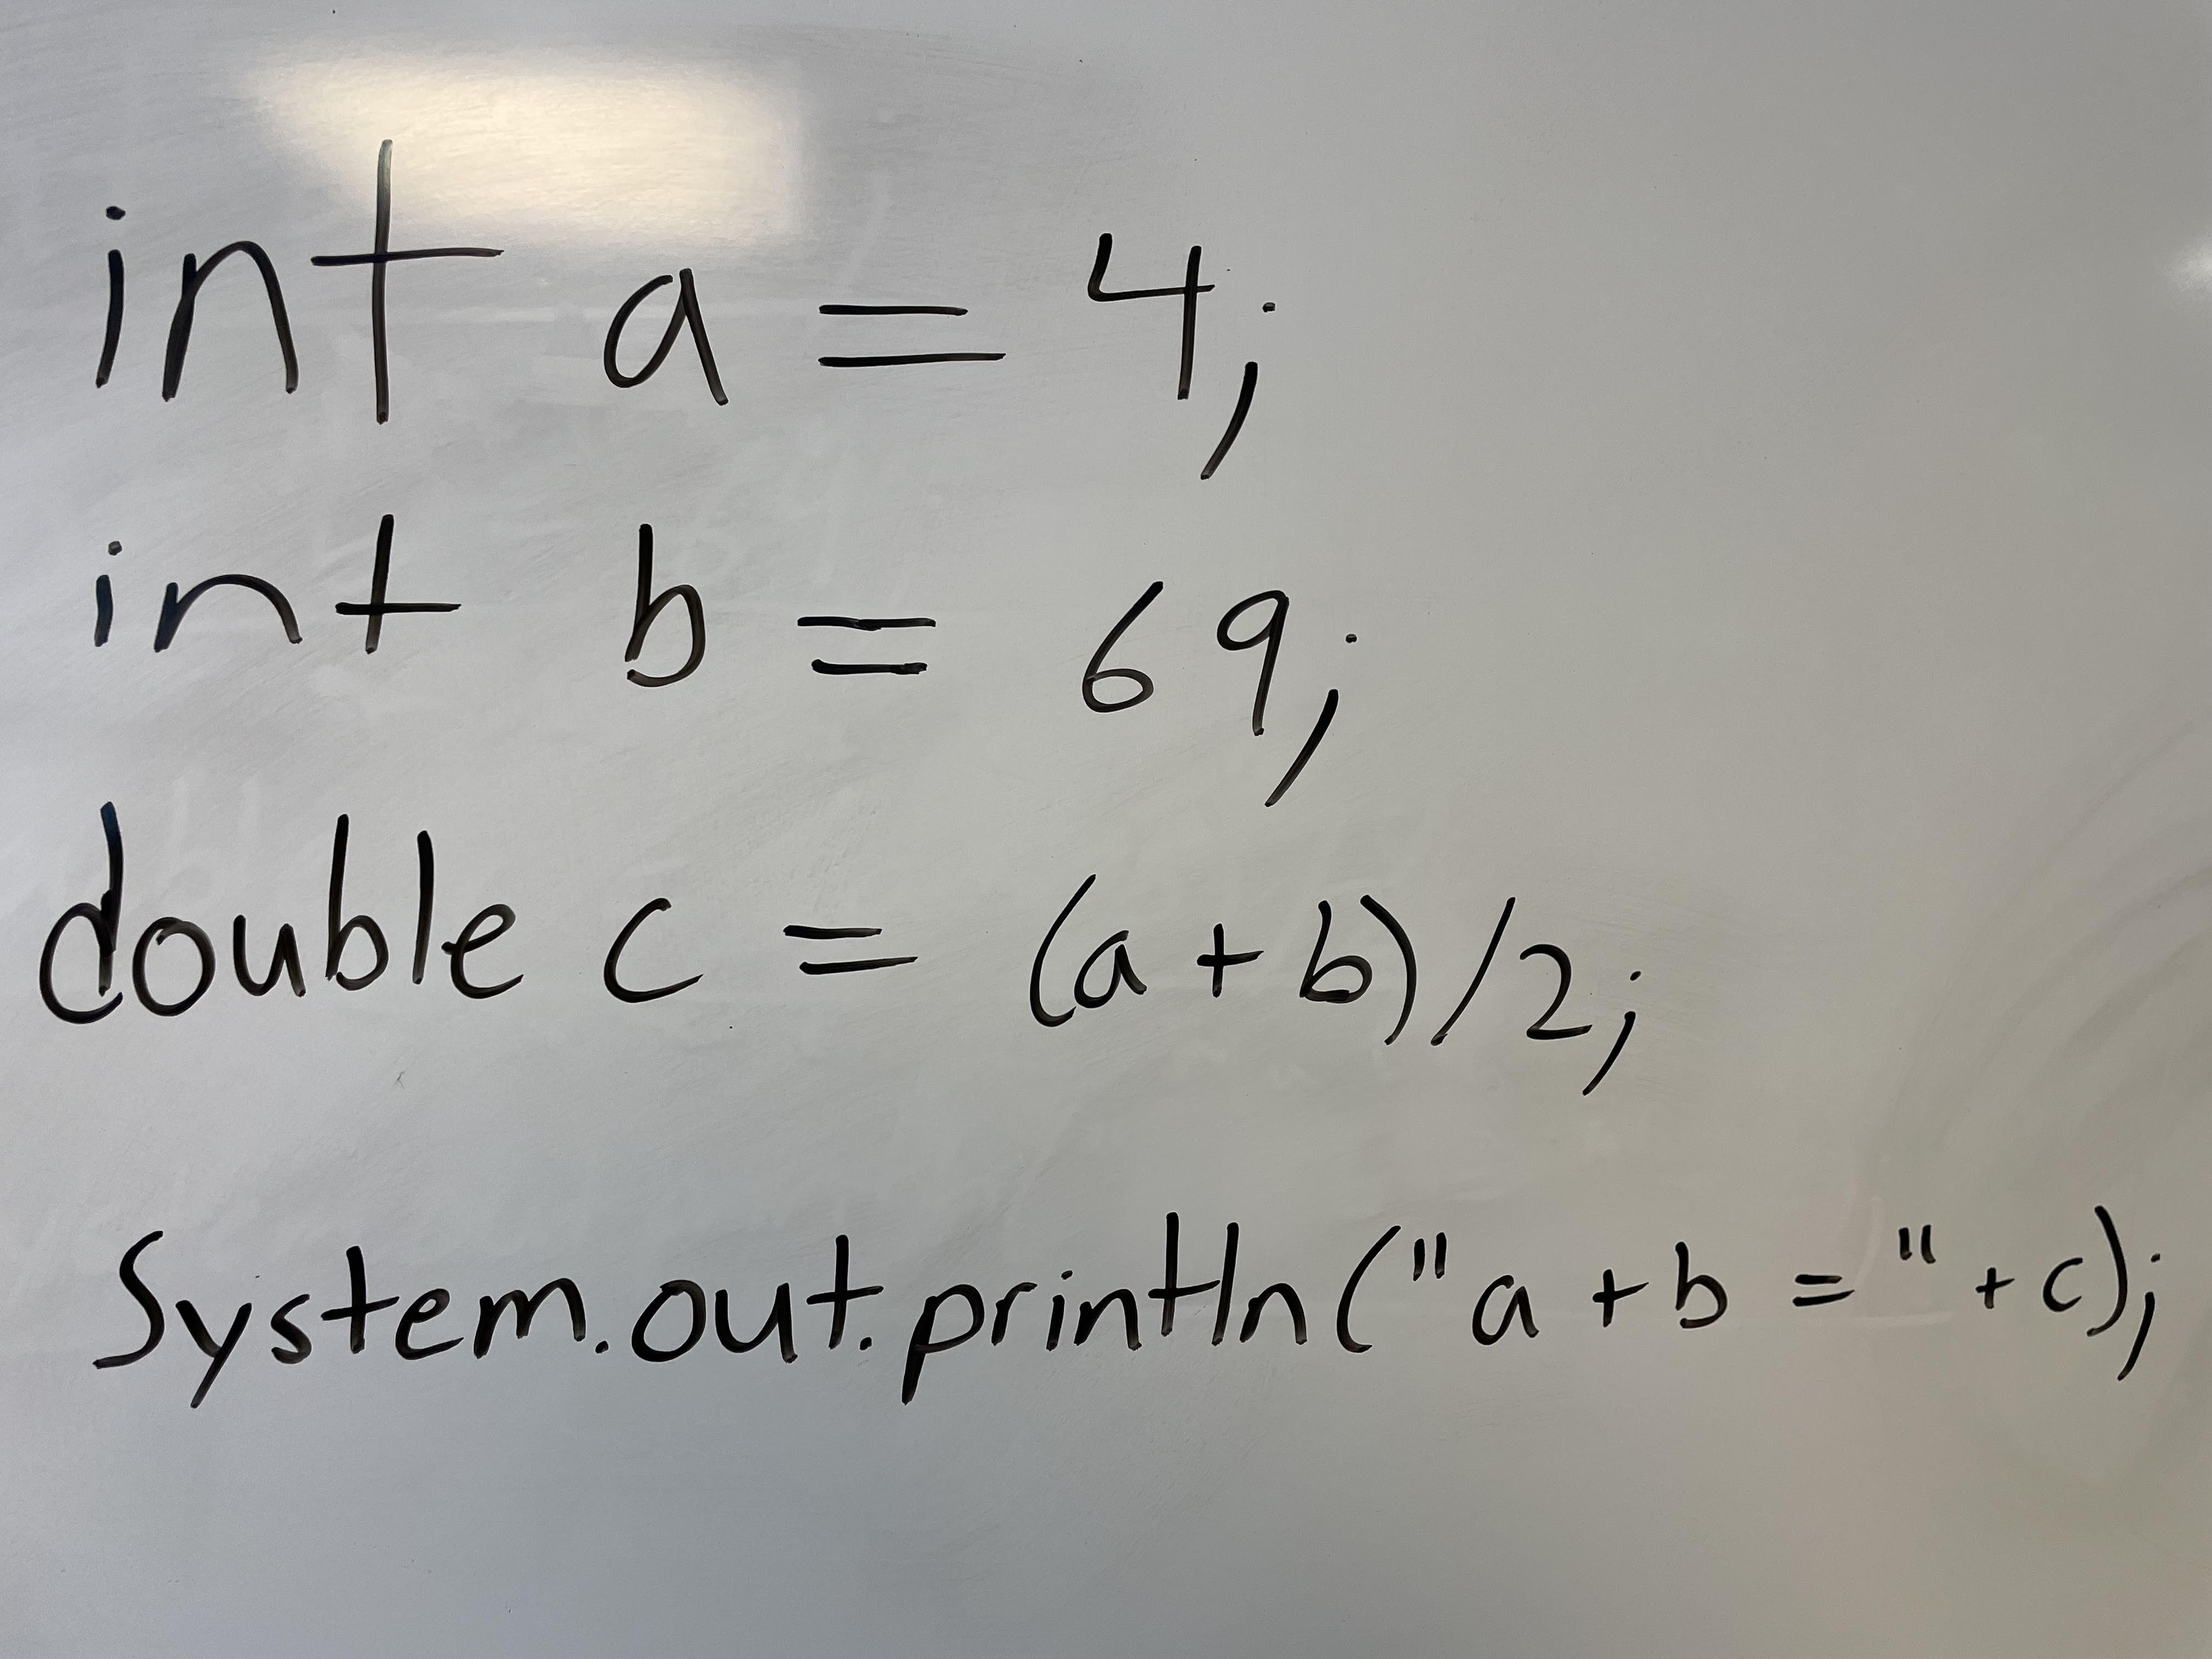

In [3]:
file

In [19]:
data = json.load(open('tmp/output.json'))

In [20]:
data['responses'][0]

{'fullTextAnnotation': {'pages': [{'blocks': [{'blockType': 'TEXT',
      'boundingBox': {'vertices': [{'x': 104, 'y': 235},
        {'x': 3960, 'y': 354},
        {'x': 3889, 'y': 2665},
        {'x': 33, 'y': 2546}]},
      'paragraphs': [{'boundingBox': {'vertices': [{'x': 174, 'y': 237},
          {'x': 3104, 'y': 456},
          {'x': 2985, 'y': 2044},
          {'x': 55, 'y': 1826}]},
        'words': [{'boundingBox': {'vertices': [{'x': 173, 'y': 245},
            {'x': 908, 'y': 297},
            {'x': 876, 'y': 744},
            {'x': 141, 'y': 692}]},
          'property': {'detectedLanguages': [{'confidence': 1.0,
             'languageCode': 'en'}]},
          'symbols': [{'boundingBox': {'vertices': [{'x': 173, 'y': 245},
              {'x': 299, 'y': 254},
              {'x': 267, 'y': 701},
              {'x': 141, 'y': 692}]},
            'text': 'i'},
           {'boundingBox': {'vertices': [{'x': 302, 'y': 254},
              {'x': 568, 'y': 273},
              {'x': 

In [21]:
code = data['responses'][0]['fullTextAnnotation']['text']

In [22]:
lines = code.split('\n')
for i in range(len(lines)):
    if lines[i] and lines[i][-1] in ',.:':
        lines[i] = lines[i][:-1] + ';'
    elif lines[i] and lines[i][-1] != ';':
        lines[i] += ';'

In [32]:
if os.path.isfile('tmp/code.java'):
    os.remove('tmp/code.java')
f = open('tmp/code.java', 'a')

pre = """
class Test {
public static void main(String[] args) {
"""

post = """
}
}
"""

f.writelines(pre)
f.writelines('\n'.join(lines))
f.writelines(post)


f.close()